In [3]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from sklearn.model_selection import KFold

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams["axes.unicode_minus"] = False

# 한글 폰트 설정
plt.rc("font",family="Malgun Gothic")

In [141]:
file = pd.read_csv("Modified_F1_Data.csv")
print(file)

      starting_grid  laps  total_laptime  fastestLapTime  fastestLapSpeed  \
0                 2    57       2895.600            90.6          210.815   
1                 1    57       2903.660            90.6          210.608   
2                 3    57       2905.243            90.0          212.235   
3                 8    57       2919.930            89.0          214.510   
4                 6    57       2954.579            92.3          206.861   
...             ...   ...            ...             ...              ...   
1803             10    52       1410.677            89.7          236.401   
1804              9    52       1415.487            89.7          236.380   
1805             13    52       1426.403            90.2          235.041   
1806             12    52       1436.060            90.0          235.713   
1807             17    52       1437.253            90.1          235.396   

      pitstop_count  pitstop_duration  average_quali  lastest_standing  \
0

In [143]:
df = pd.DataFrame(file)
df

,starting_grid,laps,total_laptime,fastestLapTime,fastestLapSpeed,pitstop_count,pitstop_duration,average_quali,lastest_standing,result_position
0,2,57,2895.600,90.6,210.815,2,18.155000,85.300000,3,1
1,1,57,2903.660,90.6,210.608,2,18.168333,84.600000,4,1
2,3,57,2905.243,90.0,212.235,2,18.155000,85.633333,2,1
3,8,57,2919.930,89.0,214.510,2,18.163333,86.033333,1,1
4,6,57,2954.579,92.3,206.861,2,18.163333,85.666667,9,1
...,...,...,...,...,...,...,...,...,...,...
1803,10,52,1410.677,89.7,236.401,1,29.341000,88.300000,7,0
1804,9,52,1415.487,89.7,236.380,2,29.410000,88.200000,8,0
1805,13,52,1426.403,90.2,235.041,2,29.658000,89.150000,14,0
1806,12,52,1436.060,90.0,235.713,2,29.444000,89.400000,12,0


In [145]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [147]:
X.head()

,starting_grid,laps,total_laptime,fastestLapTime,fastestLapSpeed,pitstop_count,pitstop_duration,average_quali,lastest_standing
0,2,57,2895.600,90.6,210.815,2,18.155000,85.300000,3
1,1,57,2903.660,90.6,210.608,2,18.168333,84.600000,4
2,3,57,2905.243,90.0,212.235,2,18.155000,85.633333,2
3,8,57,2919.930,89.0,214.510,2,18.163333,86.033333,1
4,6,57,2954.579,92.3,206.861,2,18.163333,85.666667,9


In [149]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: result_position, dtype: int64

# 결측치, 데이터 타입 확인

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   starting_grid     1808 non-null   int64  
 1   laps              1808 non-null   int64  
 2   total_laptime     1808 non-null   float64
 3   fastestLapTime    1808 non-null   float64
 4   fastestLapSpeed   1808 non-null   float64
 5   pitstop_count     1808 non-null   int64  
 6   pitstop_duration  1808 non-null   float64
 7   average_quali     1808 non-null   float64
 8   lastest_standing  1808 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 127.3 KB


In [154]:
X.describe()

,starting_grid,laps,total_laptime,fastestLapTime,fastestLapSpeed,pitstop_count,pitstop_duration,average_quali,lastest_standing
count,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000
mean,7.793695,59.189712,1884.942983,89.503319,211.291776,1.507743,23.498071,86.493289,7.415929
std,5.315817,9.388672,692.273894,11.902281,20.448510,0.736393,4.110548,12.072534,4.735226
min,0.000000,28.000000,61.300000,55.400000,151.620000,1.000000,1.058333,53.700000,1.000000
25%,3.000000,53.000000,1523.524000,79.800000,200.858250,1.000000,21.452000,77.191667,3.000000
50%,7.000000,57.000000,1907.623000,90.700000,211.892000,1.000000,23.113000,87.758333,7.000000
75%,12.000000,67.000000,2232.897500,98.100000,226.583500,2.000000,24.854750,93.866667,11.000000
max,22.000000,87.000000,3662.390000,114.300000,255.014000,5.000000,44.747000,128.500000,20.000000


In [156]:
y.value_counts()

result_position
0    948
1    860
Name: count, dtype: int64

# Train/Test 데이터 분리
## Training 데이터 70% / Testing 데이터 30%

In [158]:
# Train set / Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f"Train set dimension is {X_train.shape}")
print(f"Test set dimension is {X_test.shape}")

Train set dimension is (1265, 9)
Test set dimension is (543, 9)


# 모델링
## 하이퍼파라미터 결정

In [160]:
rfc = RandomForestClassifier(n_estimators=50,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [162]:
# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:0.9992


Test set에 대한 성능
정확도:0.8066


# 단일 하이퍼파라미터 최적화

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:15<00:00,  1.51s/it]


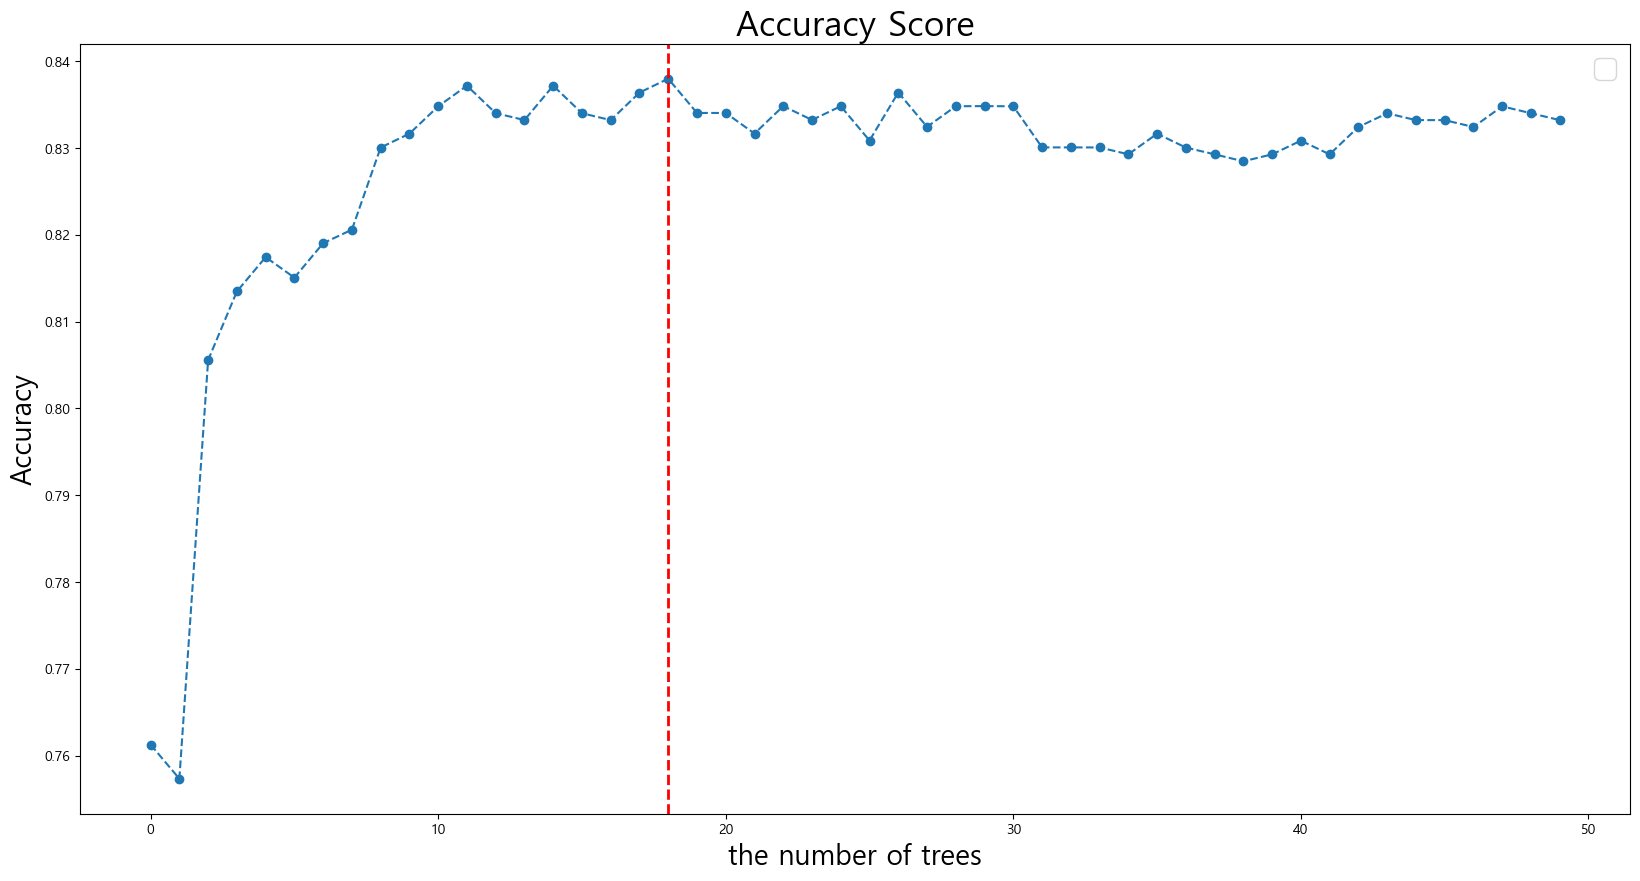

In [164]:
cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=0)
    score = cross_val_score(rfc,X_train,y_train,cv=10,scoring="accuracy").mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"],fontsize=20)
plt.plot(estimator_list,cv_scores, marker="o", ls="dashed")
plt.xlabel("the number of trees", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0],color="r",ls="--",linewidth=2)
plt.show()

In [166]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Train set에 대한 성능 (10 fold cross validation)")
print(f"정확도:{max(cv_scores):0.4f}")

최적의 tree개수:19


Train set에 대한 성능 (10 fold cross validation)
정확도:0.8380


# 전체 하이퍼파라미터 최적화

In [196]:
rfc = RandomForestClassifier(random_state=0)
param_grid = {
    "n_estimators" : [50,60,70],
    "max_depth" : [10,15,20],
    "criterion" : ["gini","entropy"],
    "max_features" : ["auto","sqrt","log2"]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)
CV_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


C:\Users\atg72\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\atg72\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\atg72\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\atg72\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\atg72\anaconda3\Lib\site-package

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 60, 70]},
             verbose=1)

In [198]:
# 최적의 하이퍼 파라미터 셋
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [200]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by="mean_test_score", ascending=False)
print(result_table[["params","mean_test_score"]])

                                               params  mean_test_score
39  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.845844
42  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.845844
51  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.845069
48  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.845069
41  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.843482
44  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.843482
31  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.843476
34  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.843476
16  {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.842701
13  {'criterion': 'gini', 'max_depth': 15, 'max_fe...         0.842701
5   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.841895
8   {'criterion': 'gini', 'max_depth': 10, 'max_fe...         0.841895
40  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.841120
43  {'

In [202]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=50,
                       random_state=0)

In [204]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("\n")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:0.9992


Test set에 대한 성능
정확도:0.8140


In [208]:
recall = recall_score(y_true = y_test, y_pred = y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) ## 정밀도

print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep="  |  ")

정확도:0.8140  |  민감도:0.7946  |  정밀도:0.8103


In [216]:
df_features = df.drop(columns=['result_position']).columns

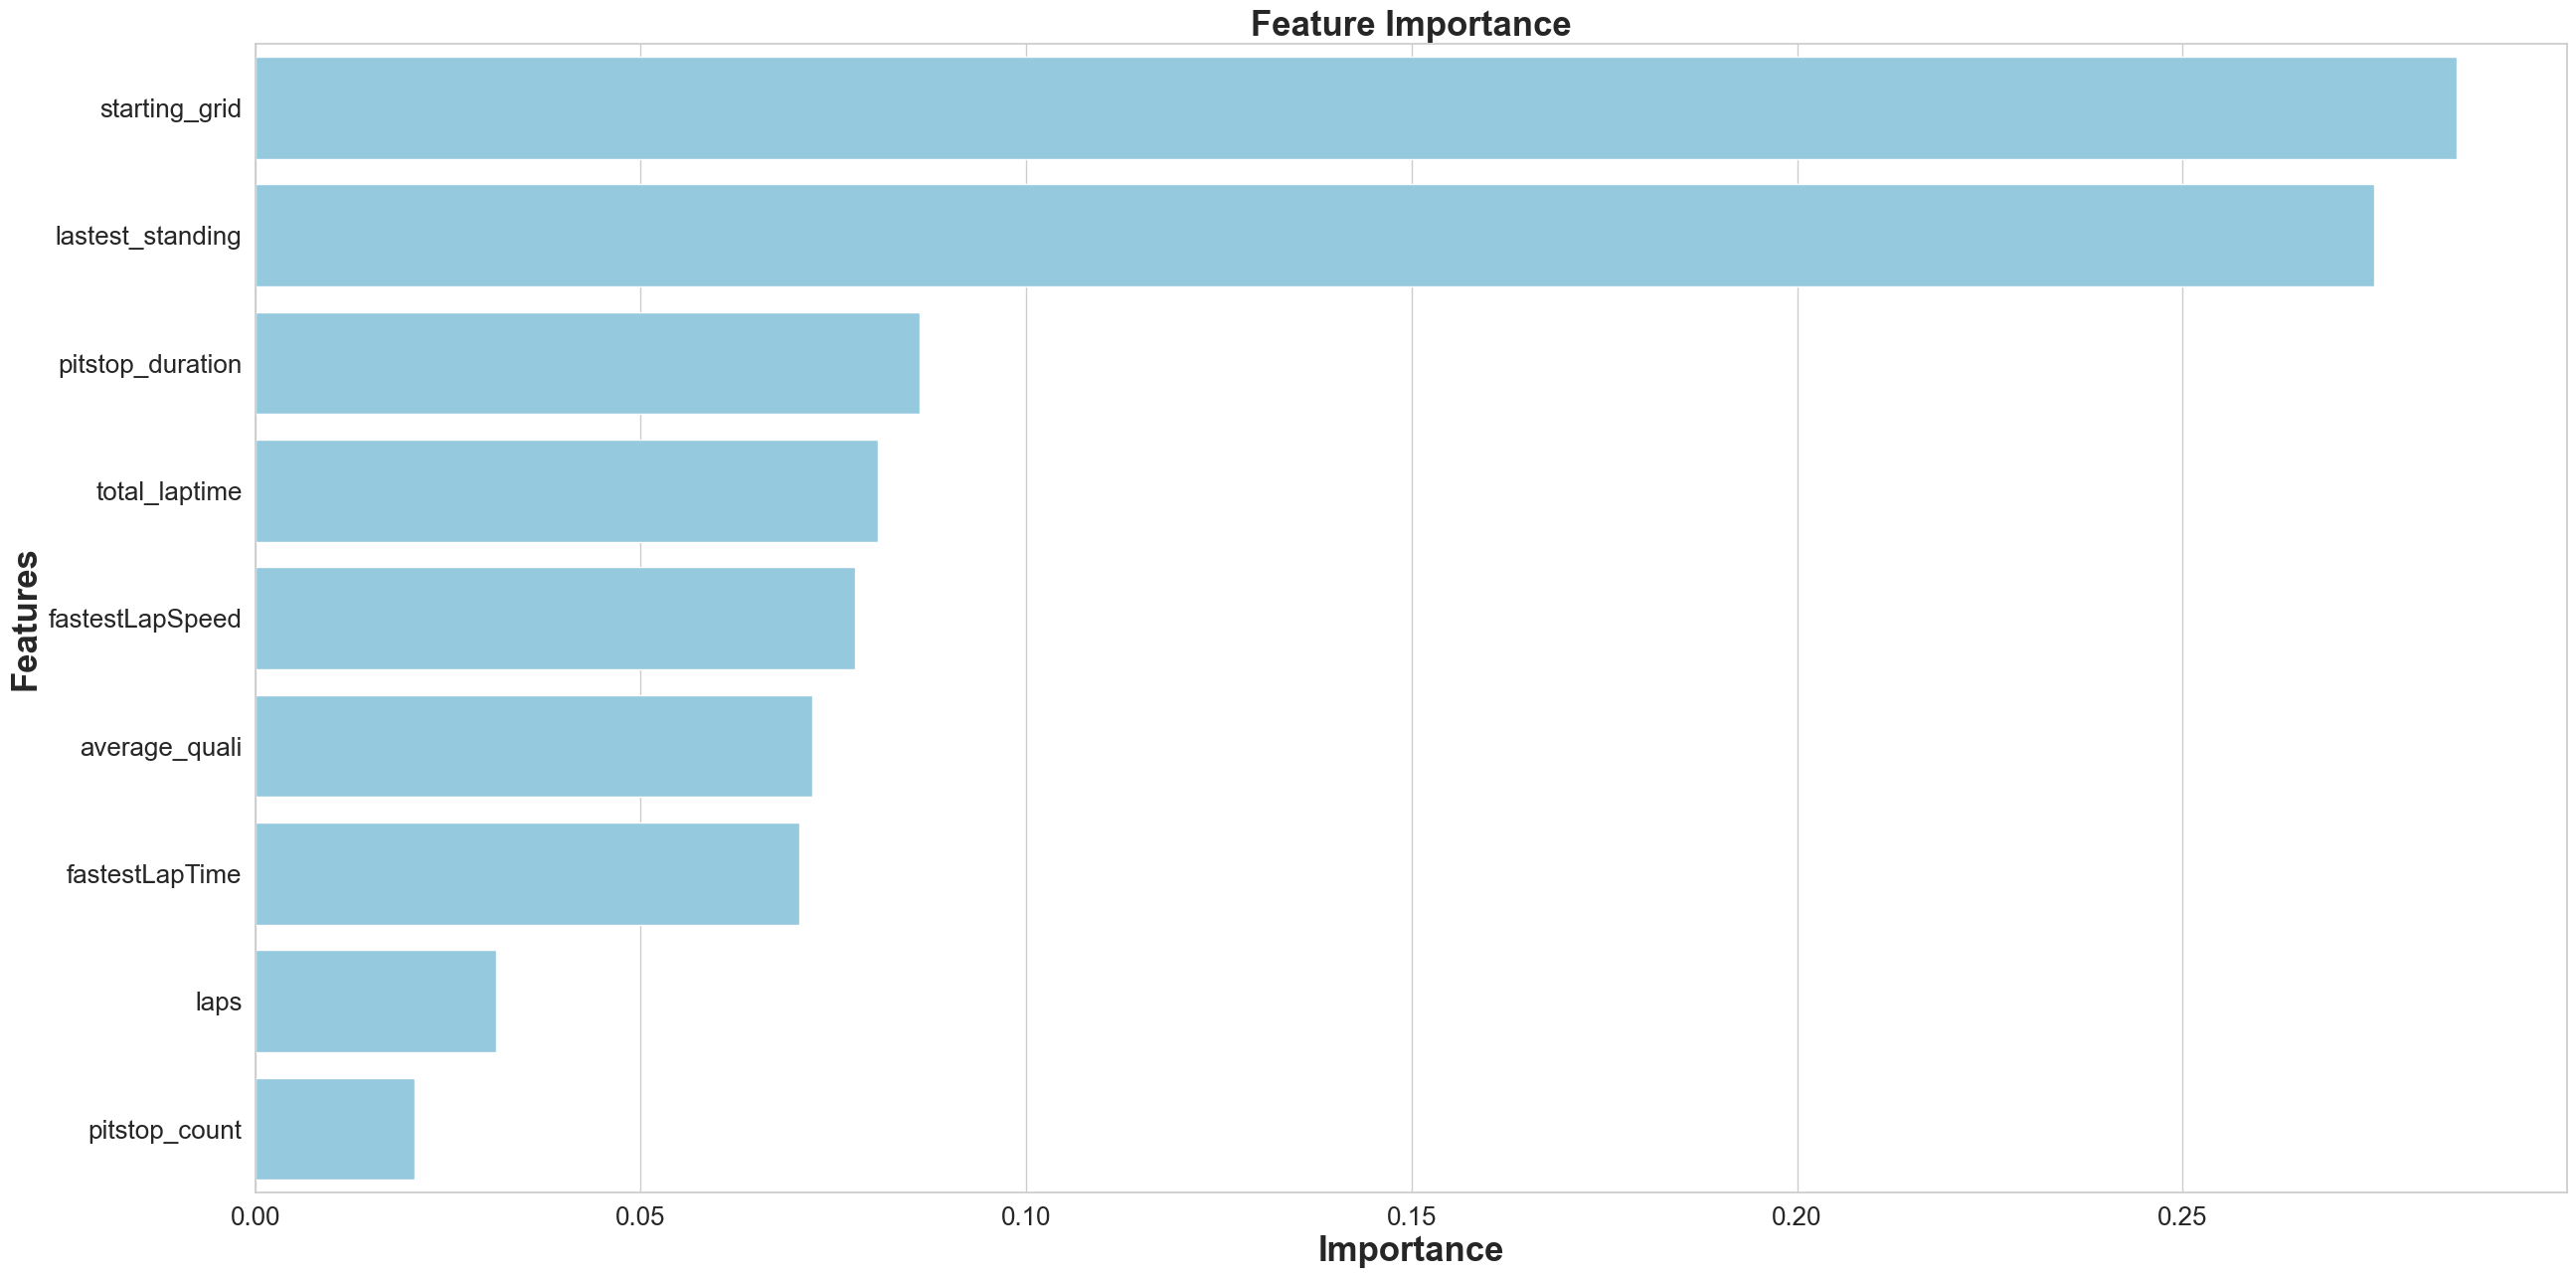

None

,Features,Gini-Importance
0,starting_grid,0.285572
1,lastest_standing,0.274903
2,pitstop_duration,0.086208
3,total_laptime,0.080789
4,fastestLapSpeed,0.077793
5,average_quali,0.072220
6,fastestLapTime,0.070631
7,laps,0.031191
8,pitstop_count,0.020693


In [222]:
feats = {}
for feature, importance in zip(df_features, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient="index").rename(columns={0:"Gini-Importance"})
importances = importances.sort_values(by="Gini-Importance", ascending=False)
importances = importances.reset_index() 
importances = importances.rename(columns={"index" : "Features"})
sns.set(font_scale=5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances["Gini-Importance"], y=importances["Features"], data=importances, color="skyblue")
plt.xlabel("Importance", fontsize=25, weight="bold")
plt.ylabel("Features", fontsize=25, weight="bold")
plt.title("Feature Importance", fontsize=25, weight="bold")
display(plt.show())
display(importances)

# 타 알고리즘과의 비교

In [225]:
# KNN
classifier = KNeighborsClassifier(n_neighbors= 5, p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred = y_pred) ## 정확도
recall = recall_score(y_true = y_test, y_pred = y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) ## 정밀도

print("KNN")
print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep="  |  ")

KNN
정확도:0.7974  |  민감도:0.7829  |  정밀도:0.7891


In [227]:
# Decision Tree
classifier = DecisionTreeClassifier(random_state=0)
param_grid = {
    "max_depth" : [10,15,20],
    "max_leaf_nodes" : [50,100,200],
    "criterion" : ["gini","entropy"]
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)
CV_classifier.fit(X_train,y_train)

best_classifier = CV_classifier.best_estimator_
best_classifier.fit(X_train,y_train)

y_pred = best_classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred = y_pred) ## 정확도
recall = recall_score(y_true = y_test, y_pred = y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) ## 정밀도

print("Decision Tree")
print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep="  |  ")

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Decision Tree
정확도:0.7901  |  민감도:0.7558  |  정밀도:0.7927


# KNN
## 정확도:0.7974  |  민감도:0.7829  |  정밀도:0.7891
# Decision Tree
## 정확도:0.7901  |  민감도:0.7558  |  정밀도:0.7927
# Random Forest(proposed)
## 정확도:0.8140  |  민감도:0.7946  |  정밀도:0.8103